In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import pandas as pd

# Update this path based on your extracted file location
file_path = "/content/drive/MyDrive/CIC-IDS2017/MachineLearningCVE/Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv"

# Load dataset
df = pd.read_csv(file_path)

# Display first few rows
print(df.head())

# Check dataset info
print(df.info())

# Check for missing values
print(df.isnull().sum())


    Destination Port   Flow Duration   Total Fwd Packets  \
0                 22         1266342                  41   
1                 22         1319353                  41   
2                 22             160                   1   
3                 22         1303488                  41   
4              35396              77                   1   

    Total Backward Packets  Total Length of Fwd Packets  \
0                       44                         2664   
1                       44                         2664   
2                        1                            0   
3                       42                         2728   
4                        2                            0   

    Total Length of Bwd Packets   Fwd Packet Length Max  \
0                          6954                     456   
1                          6954                     456   
2                             0                       0   
3                          6634                 

In [ ]:
# Check for duplicate rows
duplicate_rows = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_rows}")


Number of duplicate rows: 72353


In [ ]:
# Remove duplicate rows
df = df.drop_duplicates()
print(f"Shape after removing duplicates: {df.shape}")


Shape after removing duplicates: (214114, 79)


In [ ]:
# Check for missing values
missing_values = df.isnull().sum().sum()
print(f"Total missing values: {missing_values}")


Total missing values: 15


In [ ]:
# Drop rows with missing values
df.dropna(inplace=True)

# Confirm missing values are removed
missing_values_after = df.isnull().sum().sum()
print(f"Total missing values after removal: {missing_values_after}")


Total missing values after removal: 0


Highly correlated feature pairs (>|0.9| correlation):
(' Flow Duration', 'Fwd IAT Total')
(' Flow Duration', 'Bwd IAT Total')
(' Total Fwd Packets', ' Total Backward Packets')
(' Total Fwd Packets', ' Total Length of Bwd Packets')
(' Total Fwd Packets', ' Fwd Header Length')
(' Total Fwd Packets', ' Bwd Header Length')
(' Total Fwd Packets', ' Fwd Header Length.1')
(' Total Fwd Packets', 'Subflow Fwd Packets')
(' Total Fwd Packets', ' Subflow Bwd Packets')
(' Total Fwd Packets', ' Subflow Bwd Bytes')
(' Total Backward Packets', ' Total Length of Bwd Packets')
(' Total Backward Packets', ' Fwd Header Length')
(' Total Backward Packets', ' Bwd Header Length')
(' Total Backward Packets', ' Fwd Header Length.1')
(' Total Backward Packets', 'Subflow Fwd Packets')
(' Total Backward Packets', ' Subflow Bwd Packets')
(' Total Backward Packets', ' Subflow Bwd Bytes')
('Total Length of Fwd Packets', ' Subflow Fwd Bytes')
(' Total Length of Bwd Packets', ' Fwd Header Length')
(' Total Length of B

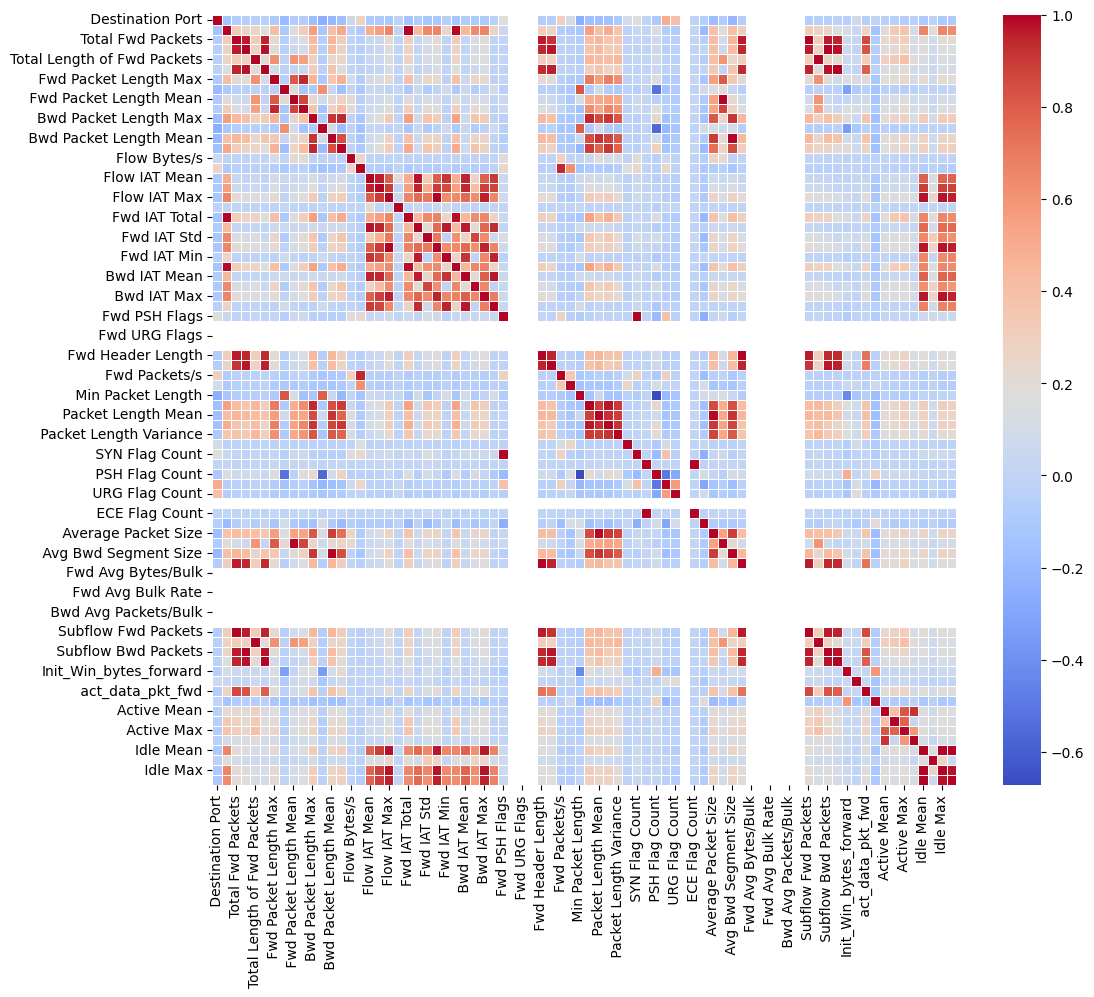

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Select only numerical columns
df_numeric = df.select_dtypes(include=[np.number])

# Compute correlation matrix
corr_matrix = df_numeric.corr()

# Set a threshold (e.g., 0.9)
threshold = 0.9

# Plot heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=False, cmap="coolwarm", linewidths=0.5)

# Identify highly correlated features
high_corr_pairs = np.where(np.abs(corr_matrix) > threshold)
high_corr_pairs = [(corr_matrix.index[i], corr_matrix.columns[j])
                   for i, j in zip(*high_corr_pairs) if i != j and i < j]

print("Highly correlated feature pairs (>|0.9| correlation):")
for pair in high_corr_pairs:
    print(pair)

plt.show()


Dropping 32 highly correlated features:
{' Fwd IAT Min', ' Active Min', 'Fwd Packets/s', ' Subflow Bwd Packets', ' Fwd IAT Max', 'Fwd IAT Total', ' Bwd IAT Mean', ' Total Backward Packets', ' Total Length of Bwd Packets', ' ECE Flag Count', ' Avg Bwd Segment Size', ' Flow IAT Std', ' Idle Min', ' SYN Flag Count', ' Max Packet Length', ' Subflow Bwd Bytes', 'Idle Mean', ' Packet Length Std', 'Bwd IAT Total', ' Bwd Packet Length Mean', ' Subflow Fwd Bytes', ' Bwd Packet Length Std', ' Fwd IAT Mean', ' Fwd Header Length', ' Avg Fwd Segment Size', ' Idle Max', ' Bwd IAT Max', ' Average Packet Size', 'Subflow Fwd Packets', ' Fwd Header Length.1', ' Fwd Packet Length Std', ' Bwd Header Length'}


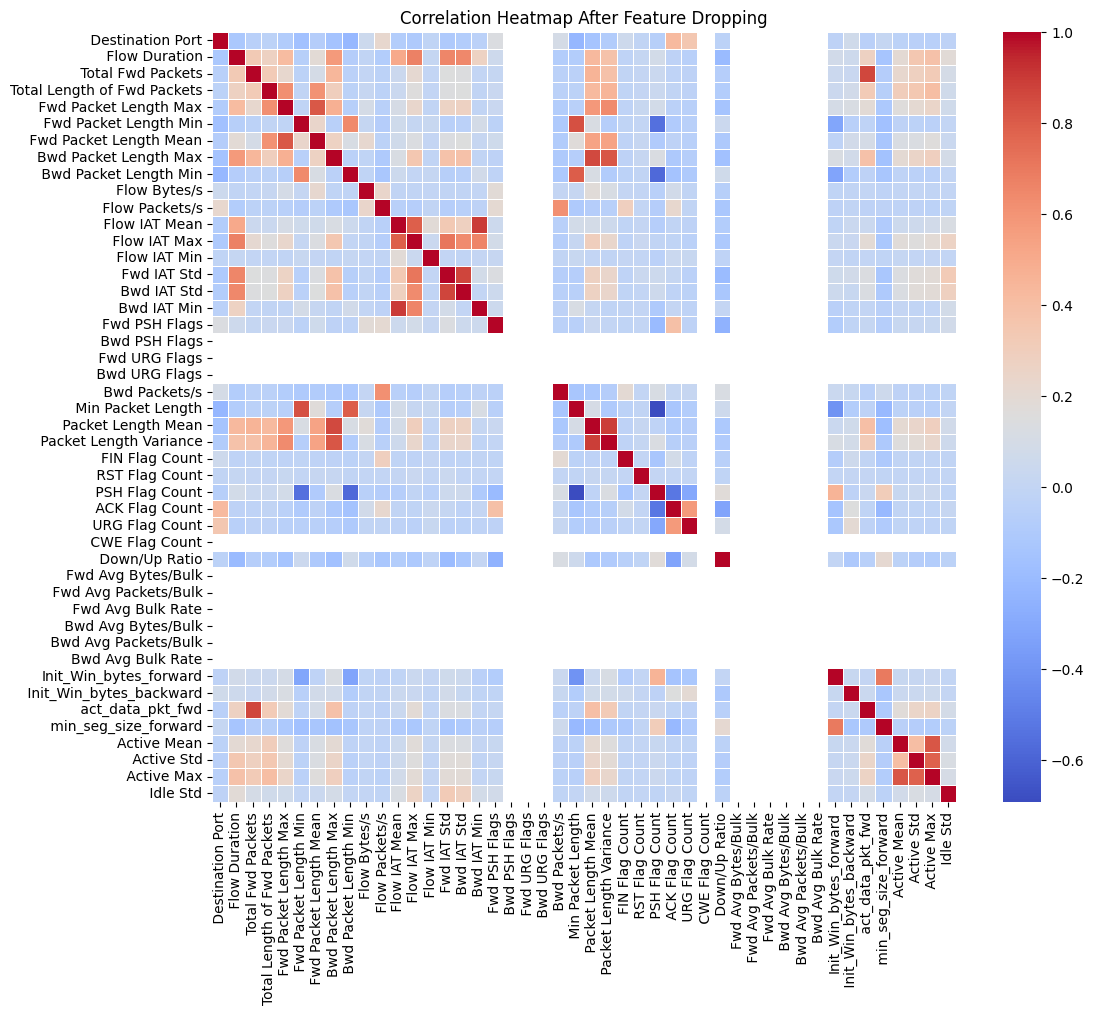

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset (ensure you use the cleaned dataset)
df = pd.read_csv("/content/drive/MyDrive/CIC-IDS2017/MachineLearningCVE/Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv")  # Change to your actual dataset

# Select numerical columns only
df_numeric = df.select_dtypes(include=[np.number])

# Compute correlation matrix
corr_matrix = df_numeric.corr().abs()

# Set a correlation threshold
threshold = 0.9

# Find highly correlated feature pairs
high_corr_pairs = np.where(corr_matrix > threshold)
high_corr_pairs = [(corr_matrix.index[i], corr_matrix.columns[j]) for i, j in zip(*high_corr_pairs) if i != j and i < j]

# Automatically select features to drop
features_to_drop = set()
for feature1, feature2 in high_corr_pairs:
    if feature1 not in features_to_drop and feature2 not in features_to_drop:
        features_to_drop.add(feature2)  # Drop one of the correlated features

print(f"Dropping {len(features_to_drop)} highly correlated features:")
print(features_to_drop)

# Drop the selected features
df_cleaned = df.drop(columns=features_to_drop, errors='ignore')

# Save the cleaned dataset
df_cleaned.to_csv("cleaned_dataset.csv", index=False)

# Verify with a new correlation heatmap
# Compute correlation matrix using only numeric columns
df_numeric_cleaned = df_cleaned.select_dtypes(include=[np.number])

# Verify with a new correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(df_numeric_cleaned.corr(), annot=False, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap After Feature Dropping")
plt.show()



In [ ]:
# Check for missing values
missing_values = df_cleaned.isnull().sum()
print(missing_values[missing_values > 0])


Flow Bytes/s    15
dtype: int64


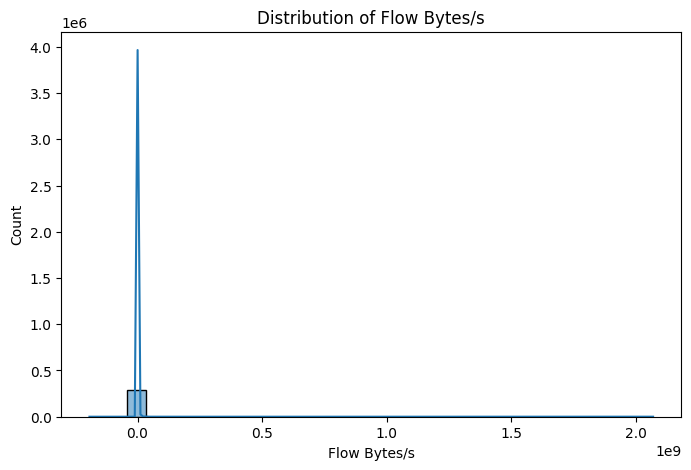

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.histplot(df_cleaned['Flow Bytes/s'], kde=True, bins=30)
plt.title('Distribution of Flow Bytes/s')
plt.show()


/usr/local/lib/python3.11/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


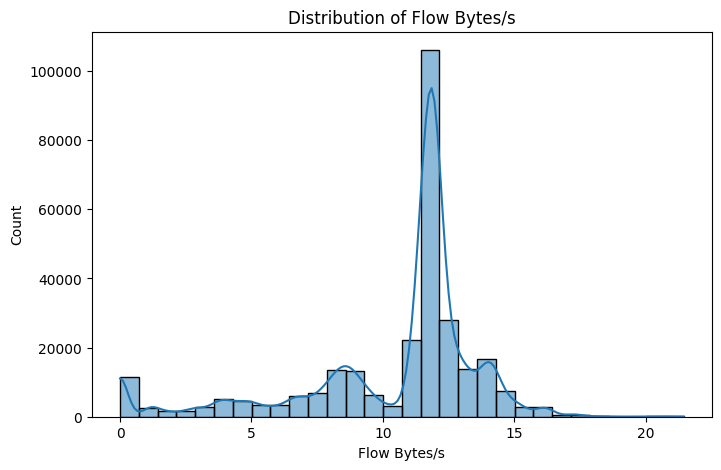

In [ ]:
df_cleaned = df_cleaned.copy()  # Ensures we modify the actual DataFrame

# Replace inf values with NaN first
df_cleaned['Flow Bytes/s'] = df_cleaned['Flow Bytes/s'].replace([np.inf, -np.inf], np.nan)

# Replace NaN with the 99th percentile of valid values
finite_max = df_cleaned['Flow Bytes/s'].quantile(0.99)
df_cleaned['Flow Bytes/s'] = df_cleaned['Flow Bytes/s'].fillna(finite_max)

df_cleaned['Flow Bytes/s'] = df_cleaned['Flow Bytes/s'].fillna(df_cleaned['Flow Bytes/s'].median())

df_cleaned['Flow Bytes/s'] = np.log1p(df_cleaned['Flow Bytes/s'])

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.histplot(df_cleaned['Flow Bytes/s'], kde=True, bins=30)
plt.title('Distribution of Flow Bytes/s')
plt.show()



In [ ]:
# Check for missing values
missing_values = df_cleaned.isnull().sum()
print(missing_values[missing_values > 0])


Flow Bytes/s    36
dtype: int64


In [ ]:


# Now check unique labels
print(df[' Label'].unique())

['BENIGN' 'PortScan']


In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df_cleaned[' Label'] = label_encoder.fit_transform(df_cleaned[' Label'])  # Convert to 0 and 1


In [ ]:
print(df_cleaned[' Label'].unique())


[0 1]


In [ ]:
import numpy as np

# Check for infinite values
print(np.isinf(df_cleaned).sum())



 Destination Port                0
 Flow Duration                   0
 Total Fwd Packets               0
Total Length of Fwd Packets      0
 Fwd Packet Length Max           0
 Fwd Packet Length Min           0
 Fwd Packet Length Mean          0
Bwd Packet Length Max            0
 Bwd Packet Length Min           0
Flow Bytes/s                     0
 Flow Packets/s                371
 Flow IAT Mean                   0
 Flow IAT Max                    0
 Flow IAT Min                    0
 Fwd IAT Std                     0
 Bwd IAT Std                     0
 Bwd IAT Min                     0
Fwd PSH Flags                    0
 Bwd PSH Flags                   0
 Fwd URG Flags                   0
 Bwd URG Flags                   0
 Bwd Packets/s                   0
 Min Packet Length               0
 Packet Length Mean              0
 Packet Length Variance          0
FIN Flag Count                   0
 RST Flag Count                  0
 PSH Flag Count                  0
 ACK Flag Count     

In [ ]:
df_cleaned[' Flow Packets/s'].replace(np.inf, df_cleaned[' Flow Packets/s'][df_cleaned[' Flow Packets/s'] != np.inf].mean(), inplace=True)
print(np.isinf(df_cleaned).sum())  # Should now be 0 for all columns


 Destination Port              0
 Flow Duration                 0
 Total Fwd Packets             0
Total Length of Fwd Packets    0
 Fwd Packet Length Max         0
 Fwd Packet Length Min         0
 Fwd Packet Length Mean        0
Bwd Packet Length Max          0
 Bwd Packet Length Min         0
Flow Bytes/s                   0
 Flow Packets/s                0
 Flow IAT Mean                 0
 Flow IAT Max                  0
 Flow IAT Min                  0
 Fwd IAT Std                   0
 Bwd IAT Std                   0
 Bwd IAT Min                   0
Fwd PSH Flags                  0
 Bwd PSH Flags                 0
 Fwd URG Flags                 0
 Bwd URG Flags                 0
 Bwd Packets/s                 0
 Min Packet Length             0
 Packet Length Mean            0
 Packet Length Variance        0
FIN Flag Count                 0
 RST Flag Count                0
 PSH Flag Count                0
 ACK Flag Count                0
 URG Flag Count                0
 CWE Flag 

<ipython-input-17-f6b042c68aa3>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_cleaned[' Flow Packets/s'].replace(np.inf, df_cleaned[' Flow Packets/s'][df_cleaned[' Flow Packets/s'] != np.inf].mean(), inplace=True)


In [ ]:
print(df_cleaned.isna().sum())


 Destination Port               0
 Flow Duration                  0
 Total Fwd Packets              0
Total Length of Fwd Packets     0
 Fwd Packet Length Max          0
 Fwd Packet Length Min          0
 Fwd Packet Length Mean         0
Bwd Packet Length Max           0
 Bwd Packet Length Min          0
Flow Bytes/s                   36
 Flow Packets/s                 0
 Flow IAT Mean                  0
 Flow IAT Max                   0
 Flow IAT Min                   0
 Fwd IAT Std                    0
 Bwd IAT Std                    0
 Bwd IAT Min                    0
Fwd PSH Flags                   0
 Bwd PSH Flags                  0
 Fwd URG Flags                  0
 Bwd URG Flags                  0
 Bwd Packets/s                  0
 Min Packet Length              0
 Packet Length Mean             0
 Packet Length Variance         0
FIN Flag Count                  0
 RST Flag Count                 0
 PSH Flag Count                 0
 ACK Flag Count                 0
 URG Flag Coun

In [ ]:
df_cleaned['Flow Bytes/s'].fillna(df_cleaned['Flow Bytes/s'].mean(), inplace=True)

print(df_cleaned.isna().sum())


 Destination Port              0
 Flow Duration                 0
 Total Fwd Packets             0
Total Length of Fwd Packets    0
 Fwd Packet Length Max         0
 Fwd Packet Length Min         0
 Fwd Packet Length Mean        0
Bwd Packet Length Max          0
 Bwd Packet Length Min         0
Flow Bytes/s                   0
 Flow Packets/s                0
 Flow IAT Mean                 0
 Flow IAT Max                  0
 Flow IAT Min                  0
 Fwd IAT Std                   0
 Bwd IAT Std                   0
 Bwd IAT Min                   0
Fwd PSH Flags                  0
 Bwd PSH Flags                 0
 Fwd URG Flags                 0
 Bwd URG Flags                 0
 Bwd Packets/s                 0
 Min Packet Length             0
 Packet Length Mean            0
 Packet Length Variance        0
FIN Flag Count                 0
 RST Flag Count                0
 PSH Flag Count                0
 ACK Flag Count                0
 URG Flag Count                0
 CWE Flag 

<ipython-input-19-6026374ebde9>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_cleaned['Flow Bytes/s'].fillna(df_cleaned['Flow Bytes/s'].mean(), inplace=True)


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_cleaned.drop(columns=[' Label']))  # Exclude target column


In [ ]:
from sklearn.model_selection import train_test_split

X = df_scaled  # Features (scaled)
y = df_cleaned[' Label']  # Target column

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


MLP

In [ ]:
import tensorflow as tf
import time
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report



# Define the MLP model
mlp_model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),  # Dropout to prevent overfitting
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dense(len(set(y_train)), activation='softmax')  # Output layer (adjust for binary/multi-class)
])

# Compile the model
mlp_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Start training time
start_time = time.time()

# Train the model
history = mlp_model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

# End training time
training_time = time.time() - start_time

# Predict on the test set
y_pred = np.argmax(mlp_model.predict(X_test), axis=1)

# Calculate Precision, Recall, F1-score
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Print evaluation metrics
print("\nModel Performance on Test Set:")
print(f"Training Time: {training_time:.2f} seconds")
print(f"Precision: {precision:.6f}")
print(f"Recall: {recall:.6f}")
print(f"F1-Score: {f1:.6f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
7162/7162 ━━━━━━━━━━━━━━━━━━━━ 46s 6ms/step - accuracy: 0.9955 - loss: 0.0226 - val_accuracy: 0.9995 - val_loss: 0.0031
Epoch 2/20
7162/7162 ━━━━━━━━━━━━━━━━━━━━ 75s 5ms/step - accuracy: 0.9994 - loss: 0.0033 - val_accuracy: 0.9996 - val_loss: 0.0025
Epoch 3/20
7162/7162 ━━━━━━━━━━━━━━━━━━━━ 36s 5ms/step - accuracy: 0.9994 - loss: 0.0034 - val_accuracy: 0.9995 - val_loss: 0.0029
Epoch 4/20
7162/7162 ━━━━━━━━━━━━━━━━━━━━ 47s 6ms/step - accuracy: 0.9994 - loss: 0.0031 - val_accuracy: 0.9996 - val_loss: 0.0020
Epoch 5/20
7162/7162 ━━━━━━━━━━━━━━━━━━━━ 73s 5ms/step - accuracy: 0.9995 - loss: 0.0027 - val_accuracy: 0.9997 - val_loss: 0.0019
Epoch 6/20
7162/7162 ━━━━━━━━━━━━━━━━━━━━ 25s 4ms/step - accuracy: 0.9996 - loss: 0.0020 - val_accuracy: 0.9997 - val_loss: 0.0020
Epoch 7/20
7162/7162 ━━━━━━━━━━━━━━━━━━━━ 24s 3ms/step - accuracy: 0.9995 - loss: 0.0020 - val_accuracy: 0.9996 - val_loss: 0.0024
Epoch 8/20
7162/7162 ━━━━━━━━━━━━━━━━━━━━ 45s 4ms/step - accuracy: 0.9996 - loss: 0

In [ ]:
from sklearn.metrics import accuracy_score, classification_report

# Predict on test set
y_pred = mlp_model.predict(X_test)
y_pred = y_pred.argmax(axis=1)  # Convert probabilities to class labels

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy:.6f}")

# Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred))


1791/1791 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step
Test Accuracy: 0.999878
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     25532
           1       1.00      1.00      1.00     31762

    accuracy                           1.00     57294
   macro avg       1.00      1.00      1.00     57294
weighted avg       1.00      1.00      1.00     57294



1D CNN

In [ ]:
import tensorflow as tf
import time
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report

# Reshape input for Conv1D (CNN requires a 3D input)
X_train_cnn = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test_cnn = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Define the 1D CNN model
cnn_model = Sequential([
    Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)),
    MaxPooling1D(pool_size=2),
    Conv1D(filters=128, kernel_size=3, activation='relu'),
    MaxPooling1D(pool_size=2),
    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(len(set(y_train)), activation='softmax')  # Output layer
])

# Compile the model
cnn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Start training time
start_time = time.time()

# Train the model
history_cnn = cnn_model.fit(X_train_cnn, y_train, epochs=20, batch_size=32, validation_data=(X_test_cnn, y_test))

# End training time
training_time = time.time() - start_time

# Predict on the test set
y_pred = np.argmax(cnn_model.predict(X_test_cnn), axis=1)

# Calculate Precision, Recall, F1-score
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Print evaluation metrics
print("\nModel Performance on Test Set:")
print(f"Training Time: {training_time:.2f} seconds")
print(f"Precision: {precision:.6f}")
print(f"Recall: {recall:.6f}")
print(f"F1-Score: {f1:.6f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
7162/7162 ━━━━━━━━━━━━━━━━━━━━ 83s 11ms/step - accuracy: 0.9958 - loss: 0.0199 - val_accuracy: 0.9995 - val_loss: 0.0029
Epoch 2/20
7162/7162 ━━━━━━━━━━━━━━━━━━━━ 75s 11ms/step - accuracy: 0.9993 - loss: 0.0034 - val_accuracy: 0.9992 - val_loss: 0.0031
Epoch 3/20
7162/7162 ━━━━━━━━━━━━━━━━━━━━ 88s 11ms/step - accuracy: 0.9993 - loss: 0.0039 - val_accuracy: 0.9995 - val_loss: 0.0036
Epoch 4/20
7162/7162 ━━━━━━━━━━━━━━━━━━━━ 80s 11ms/step - accuracy: 0.9995 - loss: 0.0030 - val_accuracy: 0.9981 - val_loss: 0.0131
Epoch 5/20
7162/7162 ━━━━━━━━━━━━━━━━━━━━ 79s 11ms/step - accuracy: 0.9994 - loss: 0.0029 - val_accuracy: 0.9996 - val_loss: 0.0022
Epoch 6/20
7162/7162 ━━━━━━━━━━━━━━━━━━━━ 88s 12ms/step - accuracy: 0.9995 - loss: 0.0029 - val_accuracy: 0.9995 - val_loss: 0.0027
Epoch 7/20
7162/7162 ━━━━━━━━━━━━━━━━━━━━ 139s 11ms/step - accuracy: 0.9994 - loss: 0.0027 - val_accuracy: 0.9996 - val_loss: 0.0023
Epoch 8/20
7162/7162 ━━━━━━━━━━━━━━━━━━━━ 76s 10ms/step - accuracy: 0.9995 

In [ ]:
# Predict on test set
y_pred_cnn = cnn_model.predict(X_test_cnn)
y_pred_cnn = y_pred_cnn.argmax(axis=1)  # Convert probabilities to class labels

# Accuracy
accuracy_cnn = accuracy_score(y_test, y_pred_cnn)
print(f"Test Accuracy: {accuracy_cnn:.6f}")

# Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred_cnn))


1791/1791 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step
Test Accuracy: 0.999703
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     25532
           1       1.00      1.00      1.00     31762

    accuracy                           1.00     57294
   macro avg       1.00      1.00      1.00     57294
weighted avg       1.00      1.00      1.00     57294



LSTM

In [ ]:
import tensorflow as tf
import time
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report

# Reshape input for LSTM (LSTM requires 3D input)
X_train_lstm = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test_lstm = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])

# Define the LSTM model
lstm_model = Sequential([
    LSTM(128, return_sequences=True, input_shape=(1, X_train.shape[1])),
    LSTM(64),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(len(set(y_train)), activation='softmax')  # Output layer
])

# Compile the model
lstm_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Start training time
start_time = time.time()

# Train the model
history_lstm = lstm_model.fit(X_train_lstm, y_train, epochs=20, batch_size=32, validation_data=(X_test_lstm, y_test))

# End training time
training_time = time.time() - start_time

# Predict on the test set
y_pred = np.argmax(lstm_model.predict(X_test_lstm), axis=1)

# Calculate Precision, Recall, F1-score
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Print evaluation metrics
print("\nModel Performance on Test Set:")
print(f"Training Time: {training_time:.2f} seconds")
print(f"Precision: {precision:.6f}")
print(f"Recall: {recall:.6f}")
print(f"F1-Score: {f1:.6f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
7162/7162 ━━━━━━━━━━━━━━━━━━━━ 61s 8ms/step - accuracy: 0.9954 - loss: 0.0246 - val_accuracy: 0.9993 - val_loss: 0.0026
Epoch 2/20
7162/7162 ━━━━━━━━━━━━━━━━━━━━ 81s 8ms/step - accuracy: 0.9994 - loss: 0.0024 - val_accuracy: 0.9996 - val_loss: 0.0024
Epoch 3/20
7162/7162 ━━━━━━━━━━━━━━━━━━━━ 84s 8ms/step - accuracy: 0.9995 - loss: 0.0024 - val_accuracy: 0.9998 - val_loss: 0.0015
Epoch 4/20
7162/7162 ━━━━━━━━━━━━━━━━━━━━ 82s 8ms/step - accuracy: 0.9997 - loss: 0.0013 - val_accuracy: 0.9998 - val_loss: 0.0014
Epoch 5/20
7162/7162 ━━━━━━━━━━━━━━━━━━━━ 80s 8ms/step - accuracy: 0.9998 - loss: 0.0011 - val_accuracy: 0.9998 - val_loss: 0.0016
Epoch 6/20
7162/7162 ━━━━━━━━━━━━━━━━━━━━ 82s 8ms/step - accuracy: 0.9998 - loss: 9.9631e-04 - val_accuracy: 0.9996 - val_loss: 0.0031
Epoch 7/20
7162/7162 ━━━━━━━━━━━━━━━━━━━━ 81s 8ms/step - accuracy: 0.9998 - loss: 9.1431e-04 - val_accuracy: 0.9998 - val_loss: 0.0017
Epoch 8/20
7162/7162 ━━━━━━━━━━━━━━━━━━━━ 82s 8ms/step - accuracy: 0.9998 -

In [ ]:
# Predict on test set
y_pred_lstm = lstm_model.predict(X_test_lstm)
y_pred_lstm = y_pred_lstm.argmax(axis=1)  # Convert probabilities to class labels

# Accuracy
accuracy_lstm = accuracy_score(y_test, y_pred_lstm)
print(f"Test Accuracy: {accuracy_lstm:.6f}")

# Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred_lstm))


1791/1791 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step
Test Accuracy: 0.999808
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     25532
           1       1.00      1.00      1.00     31762

    accuracy                           1.00     57294
   macro avg       1.00      1.00      1.00     57294
weighted avg       1.00      1.00      1.00     57294



CNN+LSTM

In [ ]:
import tensorflow as tf
import time
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, LSTM, Dense, Dropout
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report

# Reshape input for CNN+LSTM (CNN needs 3D input)
X_train_cnn_lstm = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test_cnn_lstm = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Define the CNN+LSTM model
cnn_lstm_model = Sequential([
    Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)),
    MaxPooling1D(pool_size=2),
    Conv1D(filters=128, kernel_size=3, activation='relu'),
    MaxPooling1D(pool_size=2),
    LSTM(64, return_sequences=True),
    LSTM(32),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(len(set(y_train)), activation='softmax')  # Output layer
])

# Compile the model
cnn_lstm_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Start training time
start_time = time.time()

# Train the model
history_cnn_lstm = cnn_lstm_model.fit(X_train_cnn_lstm, y_train, epochs=20, batch_size=32, validation_data=(X_test_cnn_lstm, y_test))

# End training time
training_time = time.time() - start_time

# Predict on the test set
y_pred = np.argmax(cnn_lstm_model.predict(X_test_cnn_lstm), axis=1)

# Calculate Precision, Recall, F1-score
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Print evaluation metrics
print("\nModel Performance on Test Set:")
print(f"Training Time: {training_time:.2f} seconds")
print(f"Precision: {precision:.6f}")
print(f"Recall: {recall:.6f}")
print(f"F1-Score: {f1:.6f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
7162/7162 ━━━━━━━━━━━━━━━━━━━━ 171s 23ms/step - accuracy: 0.9870 - loss: 0.0379 - val_accuracy: 0.9990 - val_loss: 0.0046
Epoch 2/20
7162/7162 ━━━━━━━━━━━━━━━━━━━━ 177s 25ms/step - accuracy: 0.9989 - loss: 0.0045 - val_accuracy: 0.9994 - val_loss: 0.0026
Epoch 3/20
7162/7162 ━━━━━━━━━━━━━━━━━━━━ 190s 23ms/step - accuracy: 0.9994 - loss: 0.0027 - val_accuracy: 0.9996 - val_loss: 0.0017
Epoch 4/20
7162/7162 ━━━━━━━━━━━━━━━━━━━━ 180s 25ms/step - accuracy: 0.9994 - loss: 0.0027 - val_accuracy: 0.9997 - val_loss: 0.0018
Epoch 5/20
7162/7162 ━━━━━━━━━━━━━━━━━━━━ 189s 23ms/step - accuracy: 0.9995 - loss: 0.0025 - val_accuracy: 0.9995 - val_loss: 0.0021
Epoch 6/20
7162/7162 ━━━━━━━━━━━━━━━━━━━━ 211s 25ms/step - accuracy: 0.9994 - loss: 0.0026 - val_accuracy: 0.9997 - val_loss: 0.0026
Epoch 7/20
7162/7162 ━━━━━━━━━━━━━━━━━━━━ 176s 25ms/step - accuracy: 0.9995 - loss: 0.0023 - val_accuracy: 0.9993 - val_loss: 0.0023
Epoch 8/20
7162/7162 ━━━━━━━━━━━━━━━━━━━━ 165s 23ms/step - accuracy: 

In [ ]:
# Predict on test set
y_pred_cnn_lstm = cnn_lstm_model.predict(X_test_cnn_lstm)
y_pred_cnn_lstm = y_pred_cnn_lstm.argmax(axis=1)  # Convert probabilities to class labels

# Accuracy
accuracy_cnn_lstm = accuracy_score(y_test, y_pred_cnn_lstm)
print(f"Test Accuracy: {accuracy_cnn_lstm:.6f}")

# Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred_cnn_lstm))


1791/1791 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step
Test Accuracy: 0.999651
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     25532
           1       1.00      1.00      1.00     31762

    accuracy                           1.00     57294
   macro avg       1.00      1.00      1.00     57294
weighted avg       1.00      1.00      1.00     57294



GRU

In [ ]:
import tensorflow as tf
import time
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, Dropout
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report

# Reshape input for GRU (GRU requires 3D input)
X_train_gru = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test_gru = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])

# Define the GRU model
gru_model = Sequential([
    GRU(128, return_sequences=True, input_shape=(1, X_train.shape[1])),
    GRU(64),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(len(set(y_train)), activation='softmax')  # Output layer
])

# Compile the model
gru_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Start training time
start_time = time.time()

# Train the model
history_gru = gru_model.fit(X_train_gru, y_train, epochs=20, batch_size=32, validation_data=(X_test_gru, y_test))

# End training time
training_time = time.time() - start_time

# Predict on the test set
y_pred = np.argmax(gru_model.predict(X_test_gru), axis=1)

# Calculate Precision, Recall, F1-score
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Print evaluation metrics
print("\nModel Performance on Test Set:")
print(f"Training Time: {training_time:.2f} seconds")
print(f"Precision: {precision:.6f}")
print(f"Recall: {recall:.6f}")
print(f"F1-Score: {f1:.6f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
7162/7162 ━━━━━━━━━━━━━━━━━━━━ 64s 8ms/step - accuracy: 0.9957 - loss: 0.0190 - val_accuracy: 0.9993 - val_loss: 0.0038
Epoch 2/20
7162/7162 ━━━━━━━━━━━━━━━━━━━━ 57s 8ms/step - accuracy: 0.9992 - loss: 0.0035 - val_accuracy: 0.9995 - val_loss: 0.0022
Epoch 3/20
7162/7162 ━━━━━━━━━━━━━━━━━━━━ 81s 8ms/step - accuracy: 0.9995 - loss: 0.0019 - val_accuracy: 0.9995 - val_loss: 0.0023
Epoch 4/20
7162/7162 ━━━━━━━━━━━━━━━━━━━━ 84s 8ms/step - accuracy: 0.9997 - loss: 0.0013 - val_accuracy: 0.9999 - val_loss: 0.0013
Epoch 5/20
7162/7162 ━━━━━━━━━━━━━━━━━━━━ 81s 8ms/step - accuracy: 0.9998 - loss: 0.0011 - val_accuracy: 0.9997 - val_loss: 0.0018
Epoch 6/20
7162/7162 ━━━━━━━━━━━━━━━━━━━━ 82s 8ms/step - accuracy: 0.9998 - loss: 9.8669e-04 - val_accuracy: 0.9998 - val_loss: 0.0031
Epoch 7/20
7162/7162 ━━━━━━━━━━━━━━━━━━━━ 82s 8ms/step - accuracy: 0.9998 - loss: 0.0012 - val_accuracy: 0.9998 - val_loss: 0.0017
Epoch 8/20
7162/7162 ━━━━━━━━━━━━━━━━━━━━ 57s 8ms/step - accuracy: 0.9998 - los

In [ ]:
# Predict on test set
y_pred_gru = gru_model.predict(X_test_gru)
y_pred_gru = y_pred_gru.argmax(axis=1)  # Convert probabilities to class labels

# Accuracy
accuracy_gru = accuracy_score(y_test, y_pred_gru)
print(f"Test Accuracy: {accuracy_gru:.6f}")

# Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred_gru))

1791/1791 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step
Test Accuracy: 0.999878
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     25532
           1       1.00      1.00      1.00     31762

    accuracy                           1.00     57294
   macro avg       1.00      1.00      1.00     57294
weighted avg       1.00      1.00      1.00     57294



BiLSTM

In [ ]:
import tensorflow as tf
import time
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Bidirectional, LSTM, Dense, Dropout
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report

# Reshape input for BiLSTM (3D input required)
X_train_bilstm = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test_bilstm = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])

# Define the BiLSTM model
bilstm_model = Sequential([
    Bidirectional(LSTM(128, return_sequences=True), input_shape=(1, X_train.shape[1])),
    Bidirectional(LSTM(64)),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(len(set(y_train)), activation='softmax')  # Output layer
])

# Compile the model
bilstm_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Start training time
start_time = time.time()

# Train the model
history_bilstm = bilstm_model.fit(X_train_bilstm, y_train, epochs=20, batch_size=32, validation_data=(X_test_bilstm, y_test))

# End training time
training_time = time.time() - start_time

# Predict on the test set
y_pred = np.argmax(bilstm_model.predict(X_test_bilstm), axis=1)

# Calculate Precision, Recall, F1-score
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Print evaluation metrics
print("\nModel Performance on Test Set:")
print(f"Training Time: {training_time:.2f} seconds")
print(f"Precision: {precision:.6f}")
print(f"Recall: {recall:.6f}")
print(f"F1-Score: {f1:.6f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
7162/7162 ━━━━━━━━━━━━━━━━━━━━ 111s 14ms/step - accuracy: 0.9966 - loss: 0.0190 - val_accuracy: 0.9981 - val_loss: 0.0038
Epoch 2/20
7162/7162 ━━━━━━━━━━━━━━━━━━━━ 101s 14ms/step - accuracy: 0.9994 - loss: 0.0024 - val_accuracy: 0.9996 - val_loss: 0.0021
Epoch 3/20
7162/7162 ━━━━━━━━━━━━━━━━━━━━ 141s 14ms/step - accuracy: 0.9995 - loss: 0.0020 - val_accuracy: 0.9996 - val_loss: 0.0012
Epoch 4/20
7162/7162 ━━━━━━━━━━━━━━━━━━━━ 100s 14ms/step - accuracy: 0.9998 - loss: 0.0011 - val_accuracy: 0.9999 - val_loss: 8.7581e-04
Epoch 5/20
7162/7162 ━━━━━━━━━━━━━━━━━━━━ 143s 14ms/step - accuracy: 0.9998 - loss: 0.0012 - val_accuracy: 0.9997 - val_loss: 0.0032
Epoch 6/20
7162/7162 ━━━━━━━━━━━━━━━━━━━━ 105s 15ms/step - accuracy: 0.9997 - loss: 0.0013 - val_accuracy: 0.9999 - val_loss: 0.0014
Epoch 7/20
7162/7162 ━━━━━━━━━━━━━━━━━━━━ 137s 14ms/step - accuracy: 0.9998 - loss: 0.0013 - val_accuracy: 0.9999 - val_loss: 0.0015
Epoch 8/20
7162/7162 ━━━━━━━━━━━━━━━━━━━━ 102s 14ms/step - accura

In [ ]:
# Predict on test set
y_pred_bilstm = bilstm_model.predict(X_test_bilstm)
y_pred_bilstm = y_pred_bilstm.argmax(axis=1)  # Convert probabilities to class labels

# Accuracy
accuracy_bilstm = accuracy_score(y_test, y_pred_bilstm)
print(f"Test Accuracy: {accuracy_bilstm:.6f}")

# Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred_bilstm))


1791/1791 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step
Test Accuracy: 0.999895
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     25532
           1       1.00      1.00      1.00     31762

    accuracy                           1.00     57294
   macro avg       1.00      1.00      1.00     57294
weighted avg       1.00      1.00      1.00     57294



CNN+BiLSTM

In [ ]:
import tensorflow as tf
import time
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Bidirectional, LSTM, Dense, Dropout
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report

# Reshape input for CNN+BiLSTM (CNN requires a specific shape)
X_train_cnn_bilstm = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test_cnn_bilstm = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Define the CNN+BiLSTM model
cnn_bilstm_model = Sequential([
    Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)),
    MaxPooling1D(pool_size=2),
    Conv1D(filters=128, kernel_size=3, activation='relu'),
    MaxPooling1D(pool_size=2),
    Bidirectional(LSTM(64)),  # Apply LSTM directly here without flattening
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(len(set(y_train)), activation='softmax')  # Output layer
])

# Compile the model
cnn_bilstm_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Start training time
start_time = time.time()

# Train the model
history_cnn_bilstm = cnn_bilstm_model.fit(X_train_cnn_bilstm, y_train, epochs=20, batch_size=32, validation_data=(X_test_cnn_bilstm, y_test))

# End training time
training_time = time.time() - start_time

# Predict on the test set
y_pred = np.argmax(cnn_bilstm_model.predict(X_test_cnn_bilstm), axis=1)

# Calculate Precision, Recall, F1-score
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Print evaluation metrics
print("\nModel Performance on Test Set:")
print(f"Training Time: {training_time:.2f} seconds")
print(f"Precision: {precision:.6f}")
print(f"Recall: {recall:.6f}")
print(f"F1-Score: {f1:.6f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
7162/7162 ━━━━━━━━━━━━━━━━━━━━ 194s 26ms/step - accuracy: 0.9921 - loss: 0.0267 - val_accuracy: 0.9993 - val_loss: 0.0036
Epoch 2/20
7162/7162 ━━━━━━━━━━━━━━━━━━━━ 200s 26ms/step - accuracy: 0.9991 - loss: 0.0036 - val_accuracy: 0.9995 - val_loss: 0.0023
Epoch 3/20
7162/7162 ━━━━━━━━━━━━━━━━━━━━ 194s 25ms/step - accuracy: 0.9995 - loss: 0.0025 - val_accuracy: 0.9995 - val_loss: 0.0016
Epoch 4/20
7162/7162 ━━━━━━━━━━━━━━━━━━━━ 216s 27ms/step - accuracy: 0.9996 - loss: 0.0016 - val_accuracy: 0.9998 - val_loss: 8.8857e-04
Epoch 5/20
7162/7162 ━━━━━━━━━━━━━━━━━━━━ 179s 25ms/step - accuracy: 0.9997 - loss: 0.0015 - val_accuracy: 0.9997 - val_loss: 0.0013
Epoch 6/20
7162/7162 ━━━━━━━━━━━━━━━━━━━━ 180s 25ms/step - accuracy: 0.9997 - loss: 0.0011 - val_accuracy: 0.9999 - val_loss: 8.2104e-04
Epoch 7/20
7162/7162 ━━━━━━━━━━━━━━━━━━━━ 187s 26ms/step - accuracy: 0.9998 - loss: 0.0011 - val_accuracy: 0.9984 - val_loss: 0.0025
Epoch 8/20
7162/7162 ━━━━━━━━━━━━━━━━━━━━ 189s 26ms/step - ac

In [ ]:
# Predict on test set
y_pred_cnn_bilstm = cnn_bilstm_model.predict(X_test_cnn_bilstm)
y_pred_cnn_bilstm = y_pred_cnn_bilstm.argmax(axis=1)  # Convert probabilities to class labels

# Accuracy
accuracy_cnn_bilstm = accuracy_score(y_test, y_pred_cnn_bilstm)
print(f"Test Accuracy: {accuracy_cnn_bilstm:.6f}")

# Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred_cnn_bilstm))


1791/1791 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step
Test Accuracy: 0.999878
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     25532
           1       1.00      1.00      1.00     31762

    accuracy                           1.00     57294
   macro avg       1.00      1.00      1.00     57294
weighted avg       1.00      1.00      1.00     57294



DBN

In [ ]:
import time
import numpy as np
from sklearn.neural_network import BernoulliRBM
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report

# Define the DBN with RBM layers and a logistic regression classifier
rbm1 = BernoulliRBM(n_components=128, learning_rate=0.01, n_iter=5, random_state=42)
rbm2 = BernoulliRBM(n_components=64, learning_rate=0.01, n_iter=5, random_state=42)
classifier = LogisticRegression(max_iter=1000, solver='lbfgs', n_jobs=-1)  # Use all CPU cores

# Create the pipeline
dbn_model = Pipeline(steps=[('rbm1', rbm1), ('rbm2', rbm2), ('classifier', classifier)])

# Start training time
start_time = time.time()

# Train the DBN model
dbn_model.fit(X_train, y_train)

# End training time
training_time = time.time() - start_time

# Predict on the test set
y_pred = dbn_model.predict(X_test)

# Calculate Precision, Recall, F1-score
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Print evaluation metrics
print("\nModel Performance on Test Set:")
print(f"Training Time: {training_time:.2f} seconds")
print(f"Precision: {precision:.6f}")
print(f"Recall: {recall:.6f}")
print(f"F1-Score: {f1:.6f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))



Model Performance on Test Set:
Training Time: 78.62 seconds
Precision: 0.991782
Recall: 0.991779
F1-Score: 0.991778

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99     25532
           1       0.99      0.99      0.99     31762

    accuracy                           0.99     57294
   macro avg       0.99      0.99      0.99     57294
weighted avg       0.99      0.99      0.99     57294



In [ ]:
from sklearn.metrics import accuracy_score, classification_report

# Predict on test set
y_pred_dbn = dbn_model.predict(X_test)

# Accuracy
accuracy_dbn = accuracy_score(y_test, y_pred_dbn)
print(f"Test Accuracy: {accuracy_dbn:.6f}")

# Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred_dbn))


Test Accuracy: 0.991779
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99     25532
           1       0.99      0.99      0.99     31762

    accuracy                           0.99     57294
   macro avg       0.99      0.99      0.99     57294
weighted avg       0.99      0.99      0.99     57294

